## Clustering Übung

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Daten einlesen
df = pd.read_csv("./data/sensors.txt")
df = df.drop(columns = ['date'])
df.describe()

No  Temperature     Humidity        Light          CO2  \
count  8143.000000  8143.000000  8143.000000  8143.000000  8143.000000   
mean   4072.000000    20.619084    25.731507   119.519375   606.546243   
std    2350.825954     1.016916     5.531211   194.755805   314.320877   
min       1.000000    19.000000    16.745000     0.000000   412.750000   
25%    2036.500000    19.700000    20.200000     0.000000   439.000000   
50%    4072.000000    20.390000    26.222500     0.000000   453.500000   
75%    6107.500000    21.390000    30.533333   256.375000   638.833333   
max    8143.000000    23.180000    39.117500  1546.333333  2028.500000   

       HumidityRatio  
count    8143.000000  
mean        0.003863  
std         0.000852  
min         0.002674  
25%         0.003078  
50%         0.003801  
75%         0.004352  
max         0.006476

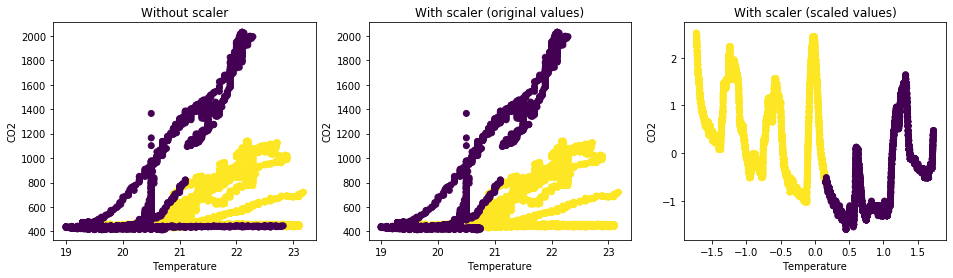

In [39]:
X = df

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

kmeans_with_scaler = KMeans(n_clusters=2, random_state=0)
X_scaled = StandardScaler().fit_transform(X)
kmeans_with_scaler.fit(X_scaled)
labels_with_scaler = kmeans_with_scaler.labels_

plt.figure(1, figsize=(16, 4))

plt.subplot(131)
plt.scatter(X['Temperature'], X['CO2'], c=labels.astype(np.float))
plt.xlabel('Temperature'); plt.ylabel('CO2'); plt.title('Without scaler')

plt.subplot(132)
plt.scatter(X['Temperature'], X['CO2'], c=labels_with_scaler.astype(np.float))
plt.xlabel('Temperature'); plt.ylabel('CO2'); plt.title('With scaler (original values)');

plt.subplot(133)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_with_scaler.astype(np.float))
plt.xlabel('Temperature'); plt.ylabel('CO2'); plt.title('With scaler (scaled values)');


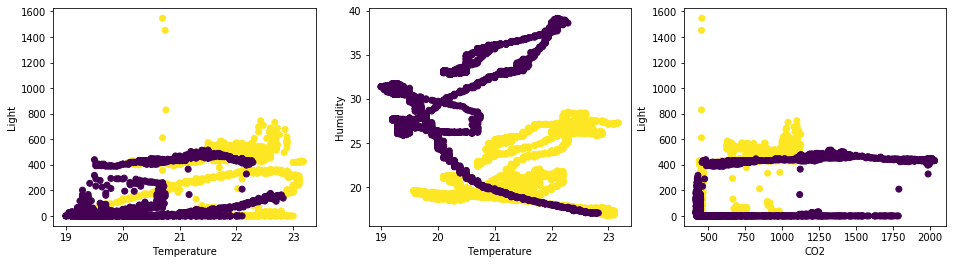

In [38]:
plt.figure(1, figsize=(16, 4))

plt.subplot(131)
plt.scatter(X['Temperature'], X['Light'], c=labels.astype(np.float))
plt.xlabel('Temperature'); plt.ylabel('Light'); 


plt.subplot(132)
plt.scatter(X['Temperature'], X['Humidity'], c=labels.astype(np.float))
plt.xlabel('Temperature'); plt.ylabel('Humidity'); 

plt.subplot(133)
plt.scatter(X['CO2'], X['Light'], c=labels.astype(np.float))
plt.xlabel('CO2'); plt.ylabel('Light'); 

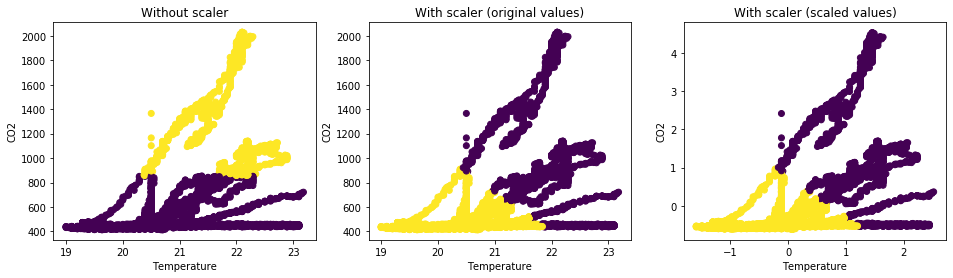

In [18]:
# K-Means mit nur 2 Attributen um die Wirkung der Anwendung des StandardScalers zu verdeutlichen.
# Ohne Skalierung dominiert die Clusterbildung fast ausschließlich der Wert mit der höheren Varianz (CO2).
# (Hier zur Demonstration wird der StandardScaler ohne Pipeline benutzt)

X = df[['Temperature', 'CO2']]

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

kmeans_with_scaler = KMeans(n_clusters=2, random_state=0)
X_scaled = StandardScaler().fit_transform(X)
kmeans_with_scaler.fit(X_scaled)
labels_with_scaler = kmeans_with_scaler.labels_

plt.figure(1, figsize=(16, 4))

plt.subplot(131)
plt.scatter(X['Temperature'], X['CO2'], c=labels.astype(np.float))
plt.xlabel('Temperature'); plt.ylabel('CO2'); plt.title('Without scaler')

plt.subplot(132)
plt.scatter(X['Temperature'], X['CO2'], c=labels_with_scaler.astype(np.float))
plt.xlabel('Temperature'); plt.ylabel('CO2'); plt.title('With scaler (original values)');

plt.subplot(133)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_with_scaler.astype(np.float))
plt.xlabel('Temperature'); plt.ylabel('CO2'); plt.title('With scaler (scaled values)');


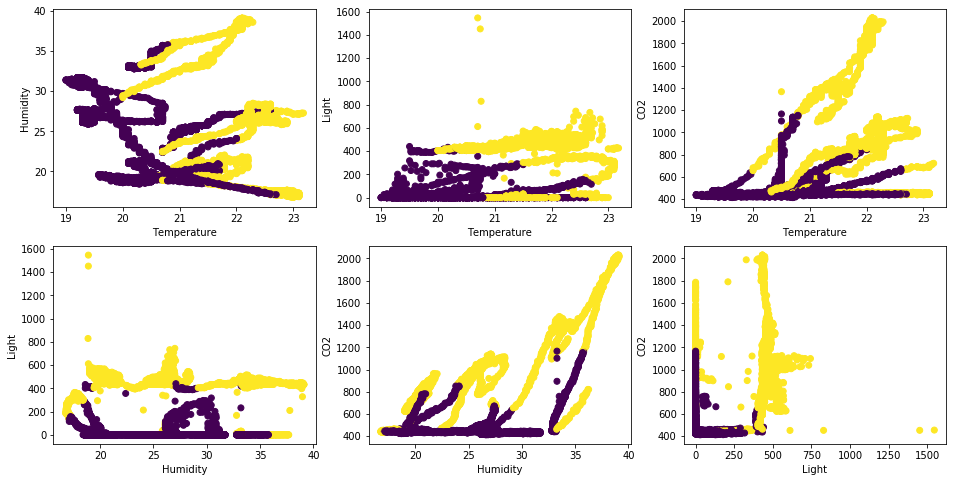

In [14]:
# 2 Cluster mittels K-means berechnen
# Andwendung des StandardScalers
# Versuch die berechneten Cluster anhand von jeweils 2 Merkmalen zu visualisieren

X = df[['Temperature', 'Humidity', 'Light', 'CO2']]

kmeans = KMeans(n_clusters=2, random_state=0)
estimation = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', kmeans),
])
estimation.fit(X)

labels = kmeans.labels_
centers = kmeans.cluster_centers_

plt.figure(1, figsize=(16, 8))

plt.subplot(231)
plt.scatter(X['Temperature'], X['Humidity'], c=labels.astype(np.float))
plt.xlabel('Temperature'); plt.ylabel('Humidity');

plt.subplot(232)
plt.scatter(X['Temperature'], X['Light'], c=labels.astype(np.float))
plt.xlabel('Temperature'); plt.ylabel('Light');

plt.subplot(233)
plt.scatter(X['Temperature'], X['CO2'], c=labels.astype(np.float))
plt.xlabel('Temperature'); plt.ylabel('CO2');

plt.subplot(234)
plt.scatter(X['Humidity'], X['Light'], c=labels.astype(np.float))
plt.xlabel('Humidity'); plt.ylabel('Light');

plt.subplot(235)
plt.scatter(X['Humidity'], X['CO2'], c=labels.astype(np.float))
plt.xlabel('Humidity'); plt.ylabel('CO2');

plt.subplot(236)
plt.scatter(X['Light'], X['CO2'], c=labels.astype(np.float))
plt.xlabel('Light'); plt.ylabel('CO2');